Let's train SEAE with Fast.ai

In [7]:
import os
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchaudio import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from data import SpeechDataset
import time
from model import Autoencoder
import pdb
import matplotlib.pyplot as plt
from pypesq import pesq
import torch.nn.functional as F
import torchaudio
from tqdm.notebook import trange, tqdm
from IPython.display import Audio
from fastai.vision import *
import numpy as np

In [8]:
batch_size = 256

Remember that fast.ai Learner expects dataset to output [x, y] and returning just a single tensor will not work

In [9]:
dataset = SpeechDataset('data/clean/360/', window_size=16384, overlap=50)

dataset_size = len(dataset)
indices = list(range(dataset_size))
validation_split = .2
split = int(np.floor(validation_split * dataset_size))
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

In [10]:
class FixedMSE(nn.Module):
    def __call__(self, x, y):
        return nn.MSELoss()(x, y.reshape(batch_size, 16384))

In [11]:
data = DataBunch(train_loader, validation_loader)
learner = Learner(data, Autoencoder(bs=batch_size).cuda(), opt_func=torch.optim.RMSprop, loss_func=FixedMSE())

In [12]:
learner.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


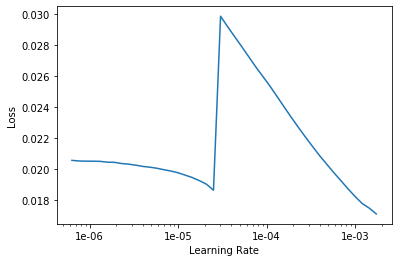

In [13]:
learner.recorder.plot()